# 3 Exploratory_Data_Analysis

## 3.1 Imports and set display

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [128]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [129]:
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf

In [130]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings

In [131]:
warnings.filterwarnings('ignore')

definite a function for scatterplots between independent variables and target variable

In [132]:
def scatterplots(data, columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        sns.scatterplot(x = col, y = 'total_sale_price', data=data, alpha=0.5, ax=ax)
        ax.set(xlabel=col, ylabel='total_sale_price')
    nsubplots = nrow * ncol
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

## 3.2 Load  datasets

dataset house_Oct29_2023.csv can be download from     
https://drive.google.com/file/d/1POj5Fz69aXYq615AV63tirLhJ2xi6NT3/view?usp=drive_link

In [133]:
# load datasets
house = pd.read_csv('house_Oct29_2023.csv', index_col=0)
house.head()

,owner1,owner2,mailing_address1,mailing_address2,real_estate_id,planning_jurisdiction,township,land_sale_price,zoning,deeded_acreage,total_sale_price,assessed_building_value,assessed_land_value,parcel_identification,billing_class,property_description,land_classification,deed_book,deed_page,vcs,property_index,year_built,units,heated_area,utilities,effective_year,story_height,design_style,foundation_basement,foundation_basement_percent,exterior_wall,heat,heat_percent,air,air_percent,bath,bath_fixtures,built_in1_description,grade,assessed_grade_difference,accrued_assessed_condition_pct,land_deferred_amount,historic_deferred_amount,recycled_units,disq_and_qual_flag,land_disq_and_qual_flag,type_and_use,physical_city,physical_zip_code,physical_location,land_sale_year,total_sale_year,deed_year,land_sale_month,total_sale_month,deed_month,distance_nearest_city,nearest_city,population_per_square_mile,unemployment_rate
0,BONES 13 LLC,NaN,306 MIDENHALL WAY,CARY NC 27513-5569,3,RA,LEESVILLE,0,IX-3,2.00,740000,524503,392040,0778.03 40 5654 000,CORPORATION,LO7 OLD SOUTH DEVELOPMENT CORP,C,14675,2635,GWRA001,J W BURRESS,1979.0,0,8508,ALL,1984.0,1.0,A,C,0,O,G,0,A,10,2.5,0,NaN,29.61,110,47,0,0,0,A,NaN,SERVICE GARAGE,RALEIGH,27617.0,6012 TRIANGLE DR A,NaN,2012.0,2012.0,NaN,3,3,13.261294,CARY,1111.136263,7.3
1,6421 WESTGATE REALTY LLC,NaN,PO BOX 90667,RALEIGH NC 27675-0667,43396,RA,LEESVILLE,0,IX-3,2.54,1650000,5013736,886242,0768.04 92 9999 000,CORPORATION,PROP OF WILLIAMS INVESTMENT CORPORATION,C,14716,1642,GWRA001,WESTGATE JEEP SALES & SERVICE,1965.0,0,27778,ALL,2015.0,1.0,A,C,0,B,A,0,A,0,2.5,0,NaN,29.71,130,99,0,0,0,A,NaN,SALES & SERVICE,RALEIGH,27617.0,6408 OLD WESTGATE RD,NaN,2012.0,2012.0,NaN,4,4,13.261294,CARY,1111.136263,7.3
2,ASH GREY PROPERTIES LLC,NaN,5805 LEASE LN,RALEIGH NC 27617-4708,45910,RA,LEESVILLE,0,IX-3,0.97,105000,80884,171125,0777.02 69 6704 000,CORPORATION,LO7 ASH GREY PROPERTIES LLC BM2013-01575,R,14744,1699,GWRA001,GWRA001,1959.0,1,616,E,1985.0,1.0,A,C,0,A,A,0,A,0,1.0,0,NaN,D-10,75,76,0,0,1,A,NaN,ONE FAMILY,RALEIGH,27617.0,8401 EBENEZER CHURCH RD,NaN,2012.0,2012.0,NaN,4,4,13.261294,CARY,1111.136263,7.3
3,CAP2 REALTY LLC,NaN,7201 SPARHAWK RD,WAKE FOREST NC 27587-4529,47829,RA,LEESVILLE,0,IX-3,2.90,975000,1187520,409290,0768.02 86 1192 000,CORPORATION,LO1 6508 MT HERMAN RD BM2015-00579,C,19002,217,GWRA001,ECGS,2005.0,0,20700,ALL,2010.0,1.0,A,C,0,O,A,64,A,64,2.5,0,NaN,29.55,100,91,0,0,0,A,NaN,SERVICE GARAGE,RALEIGH,27617.0,6508 MT HERMAN RD,NaN,2012.0,2022.0,NaN,5,4,13.261294,CARY,1111.136263,7.3
4,A&A OF NC INC,NaN,5917 TRIANGLE DR,RALEIGH NC 27617-4742,65238,RA,LEESVILLE,0,IX-3,0.95,330000,300764,186219,0778.04 50 5768 000,CORPORATION,LO17 PROP OLD SOUTH DEV CORP,D,15046,2414,GWRA001,A & A OF N.C./DBA DIAMOND TOUCH CONSTRUC,1972.0,0,4000,WSE,2000.0,1.0,A,C,0,O,A,54,A,54,2.5,0,NaN,41.61,110,75,0,0,0,A,NaN,PHARM PLANT,RALEIGH,27617.0,5917 TRIANGLE DR,NaN,2012.0,2012.0,NaN,12,12,13.261294,CARY,1111.136263,7.3


## 3.3 Check Dataset

In [134]:
house.shape

(339382, 60)

In [135]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Index: 339382 entries, 0 to 339381
Data columns (total 60 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   owner1                          339382 non-null  object 
 1   owner2                          68938 non-null   object 
 2   mailing_address1                339382 non-null  object 
 3   mailing_address2                339380 non-null  object 
 4   real_estate_id                  339382 non-null  int64  
 5   planning_jurisdiction           339382 non-null  object 
 6   township                        339382 non-null  object 
 7   land_sale_price                 339382 non-null  int64  
 8   zoning                          339375 non-null  object 
 9   deeded_acreage                  339382 non-null  float64
 10  total_sale_price                339382 non-null  int64  
 11  assessed_building_value         339382 non-null  int64  
 12  assessed_land_value  

check statistics description to get lists of continuous variables and categorical variables quickly

In [136]:
des = house.describe(include='all')
des

,owner1,owner2,mailing_address1,mailing_address2,real_estate_id,planning_jurisdiction,township,land_sale_price,zoning,deeded_acreage,total_sale_price,assessed_building_value,assessed_land_value,parcel_identification,billing_class,property_description,land_classification,deed_book,deed_page,vcs,property_index,year_built,units,heated_area,utilities,effective_year,story_height,design_style,foundation_basement,foundation_basement_percent,exterior_wall,heat,heat_percent,air,air_percent,bath,bath_fixtures,built_in1_description,grade,assessed_grade_difference,accrued_assessed_condition_pct,land_deferred_amount,historic_deferred_amount,recycled_units,disq_and_qual_flag,land_disq_and_qual_flag,type_and_use,physical_city,physical_zip_code,physical_location,land_sale_year,total_sale_year,deed_year,land_sale_month,total_sale_month,deed_month,distance_nearest_city,nearest_city,population_per_square_mile,unemployment_rate
count,339382,68938,339382,339380,339382.000000,339382,339382,3.393820e+05,339375,339382.000000,3.393820e+05,3.393820e+05,3.393820e+05,339382,339382,339352,339374,339382.000000,339382.000000,339382,338189,334837.000000,339382.000000,339382.000000,336986,334834.000000,333618.000000,333588,339382,339382.000000,333616,333600,339382.000000,333619,339382.000000,333586.000000,339382.000000,263220,334838,339382.000000,339382.000000,3.393820e+05,3.393820e+05,339382.000000,339149,133125,334627,339382,339382.000000,339382,136605.000000,339382.000000,339378.000000,136609.000000,339382.000000,339382.000000,339382.000000,339382,339382.000000,339382.000000
unique,307280,65379,294106,73138,NaN,15,20,NaN,310,NaN,NaN,NaN,NaN,339376,6,336939,23,NaN,NaN,5060,13019,NaN,NaN,NaN,15,NaN,NaN,15,3,NaN,26,7,NaN,3,NaN,NaN,NaN,21,274,NaN,NaN,NaN,NaN,NaN,19,18,93,19,NaN,339175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN,NaN
top,AC BLACKWOLF RUN OWNER LLC,BEAUTIFUL DREAMER APARTMENTS INC,PO BOX 4090,SCOTTSDALE AZ 85261-4090,NaN,RA,WHITE OAK,NaN,R-4,NaN,NaN,NaN,NaN,0785.12 85 1079 004,INDIVIDUALS,LO1,R,NaN,NaN,01RA512,01RA512,NaN,NaN,NaN,ALL,NaN,NaN,A,C,NaN,A,A,NaN,A,NaN,NaN,NaN,One Fireplace,B,NaN,NaN,NaN,NaN,NaN,A,A,ONE FAMILY,RALEIGH,NaN,129 N MAIN ST,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RALEIGH,NaN,NaN
freq,329,21,1683,1683,NaN,130979,36136,NaN,42116,NaN,NaN,NaN,NaN,2,308904,124,311107,NaN,NaN,903,903,NaN,NaN,NaN,251142,NaN,NaN,245888,294558,NaN,168584,330855,NaN,328487,NaN,NaN,NaN,249980,36501,NaN,NaN,NaN,NaN,NaN,311551,81872,319124,154491,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82983,NaN,NaN
mean,NaN,NaN,NaN,NaN,254950.157572,NaN,NaN,2.972616e+04,NaN,0.505235,3.953196e+05,3.181549e+05,1.082210e+05,NaN,NaN,NaN,NaN,15197.625272,1326.260450,NaN,NaN,1996.424484,1.149100,2860.733165,NaN,1999.837896,1.611363,NaN,NaN,10.831617,NaN,NaN,0.085429,NaN,0.179258,2.563233,0.525820,NaN,NaN,117.392036,81.104237,5.531802e+02,4.755161e+02,1.220604,NaN,NaN,NaN,NaN,27571.875256,NaN,2005.307251,2011.625351,2013.338440,6.563301,6.629600,6.646849,5.943799,NaN,1087.881155,4.442849
std,NaN,NaN,NaN,NaN,137710.153963,NaN,NaN,2.321669e+05,NaN,2.417555,1.885120e+06,1.427503e+06,3.541850e+05,NaN,NaN,NaN,NaN,4044.169270,816.673119,NaN,NaN,19.800017,7.505479,10678.263619,NaN,14.883105,0.460809,NaN,NaN,29.404170,NaN,NaN,2.356661,NaN,3.092351,0.599122,2.695846,NaN,NaN,26.739935,16.793507,3.110791e+04,4.302053e+04,7.832012,NaN,NaN,NaN,NaN,41.615929,NaN,9.194484,10.317608,9.234094,3.415126,3.282843,3.289257,3.649853,NaN,284.792880,1.538215
min,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,0.000000e+00,NaN,0.000000,1.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,1790.000000,0.000000,0.000000,NaN,1840.000000,1.000000,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,0.000000,0.000000,-8.000000,NaN,NaN,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,NaN,NaN,NaN,NaN,27501.000000,NaN,1974.000000,1974.000000,1974.000000,1.000000,1.000000,1.000000,0.449741,NaN,306.877319,1.400000
25%,NaN,NaN,NaN,NaN,142807.250000,NaN,NaN,0.000000e+00,NaN,0.130000,1.630000e+05,1.577430e+05,4.500000e+04,NaN,NaN,NaN,NaN,

In [137]:
continuous_variables = list(des.columns[des.T['mean'].notna()])
categorical_variables = list(set(house.columns) - set(continuous_variables))

In [138]:
print(f"This dataset have {house.shape[1]} variables in total")
print(f"This dataset have {len(continuous_variables)} variables as continuous variables ")
print(f"This dataset have {len(categorical_variables)} variables as categorical variables ")

This dataset have 60 variables in total
This dataset have 33 variables as continuous variables 
This dataset have 27 variables as categorical variables 


## 3.4 Distribution and Correlation

### 3.4.1 Histgrams

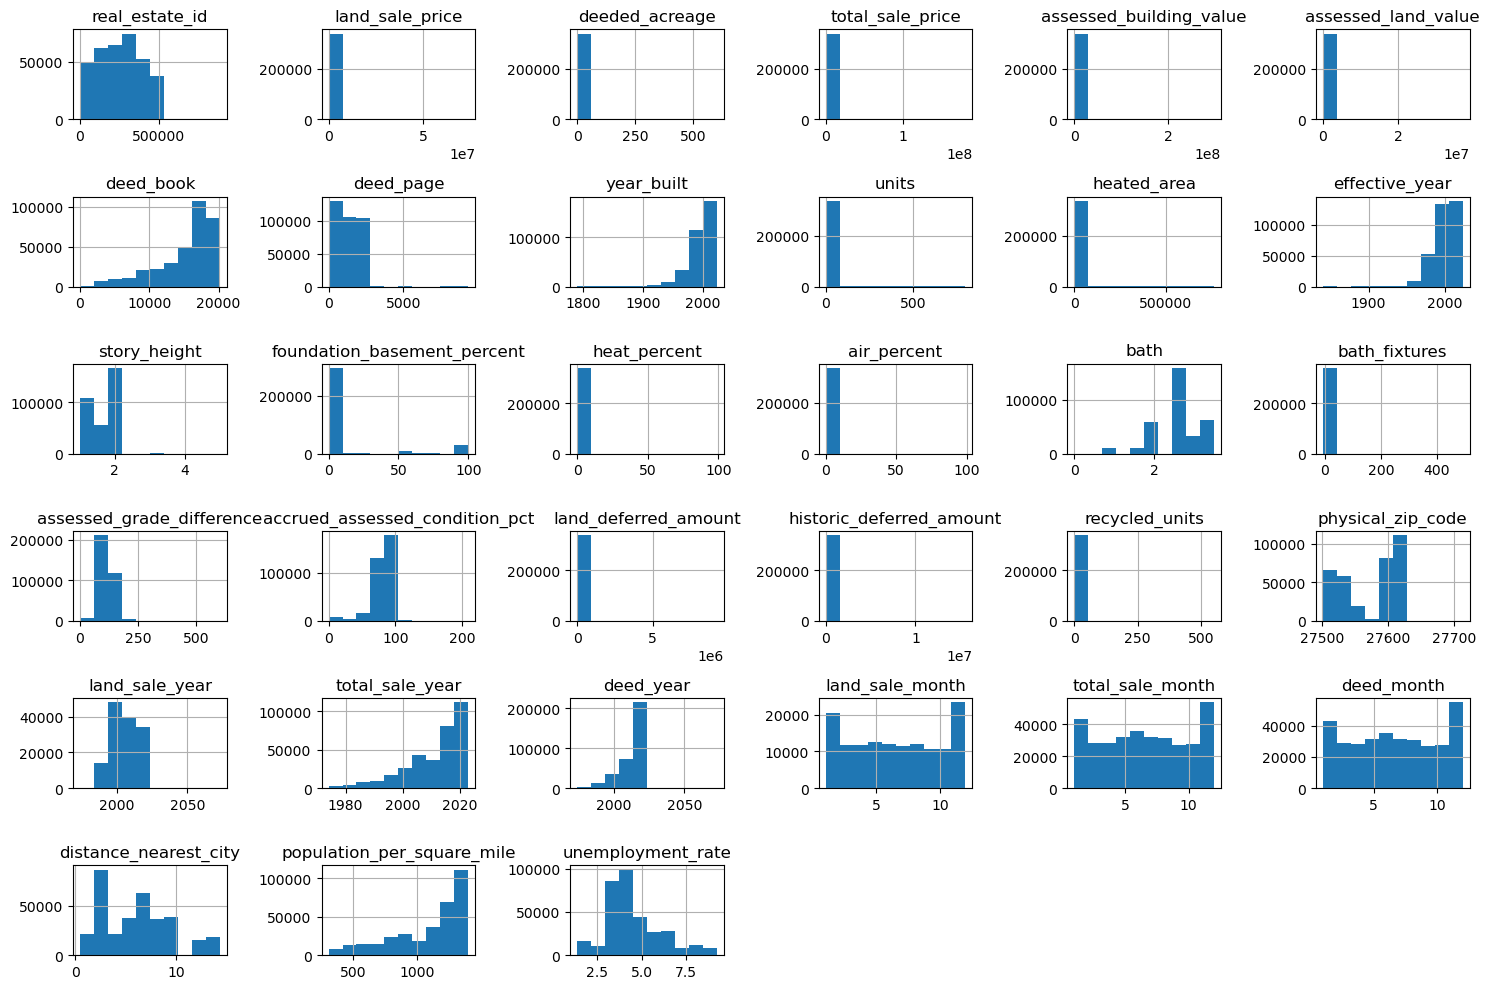

In [139]:
house.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.8)
plt.subplots_adjust(wspace=0.8)
plt.tight_layout()

The distributions of toal_sale_price, assessed_building_values and assessed_land_values etc are very strange, they have high positive skewness.

In [140]:
house[['total_sale_price', 'assessed_building_value', 'assessed_land_value']].skew()

total_sale_price           38.361883
assessed_building_value    57.163974
assessed_land_value        29.884370
dtype: float64

for example, check the boxplot of total_sale_price for each city

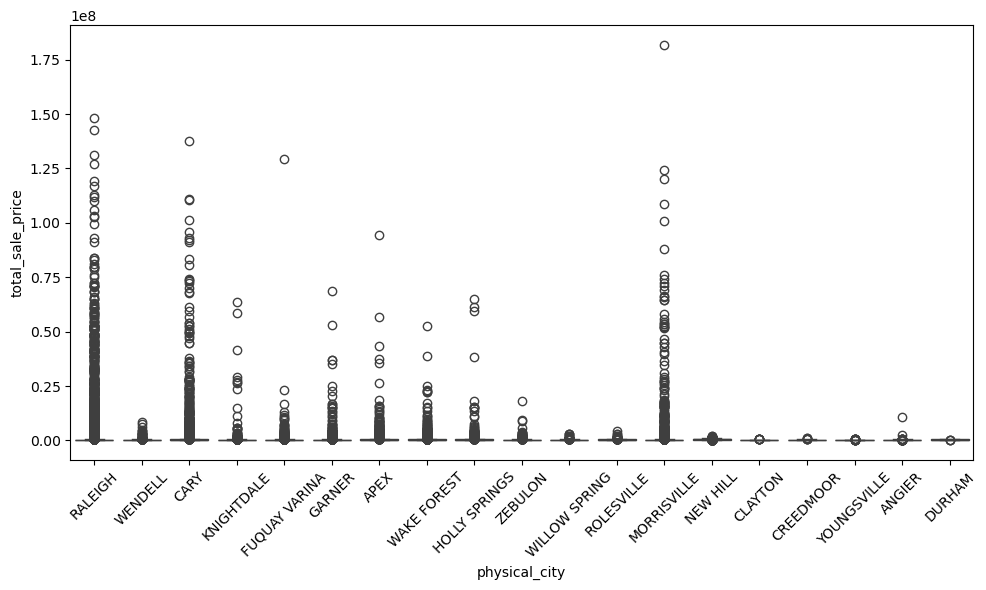

In [141]:
plt.figure(figsize=(10,6))
sns.boxplot(data=house, x='physical_city', y='total_sale_price')
plt.xticks(rotation=45)
plt.tight_layout();

the above boxplot confirmed our conclusion, there are too much outliers. let's check the percentage

In [142]:
house['total_sale_price'].describe()

count    3.393820e+05
mean     3.953196e+05
std      1.885120e+06
min      1.000000e+00
25%      1.630000e+05
50%      2.675000e+05
75%      4.030000e+05
max      1.818000e+08
Name: total_sale_price, dtype: float64

from the description of total_sale_price, the 1st quantile is 1.625e5, third quantile is 4.025e5, IQR=2.4e5, the maxmimum is 1.818e8

In [143]:
more_than_one_and_half_IQR = house[house['total_sale_price']>(4.025*10**5+1.5*2.4*10**5)].shape[0]/house.shape[0]*100
print(f'The total_sale_price have {more_than_one_and_half_IQR} percent more than 1.5 times IQR')

The total_sale_price have 4.409780129765279 percent more than 1.5 times IQR


let's try remove total_sale_price more than 1.5 times IQR to see what happened.

<font color=red>NOTE: this is just for test, we will still try to use original dataset at first!!!

In [144]:
house_1 = house[house['total_sale_price']<4.025*10**5+1.5*2.4*10**5]

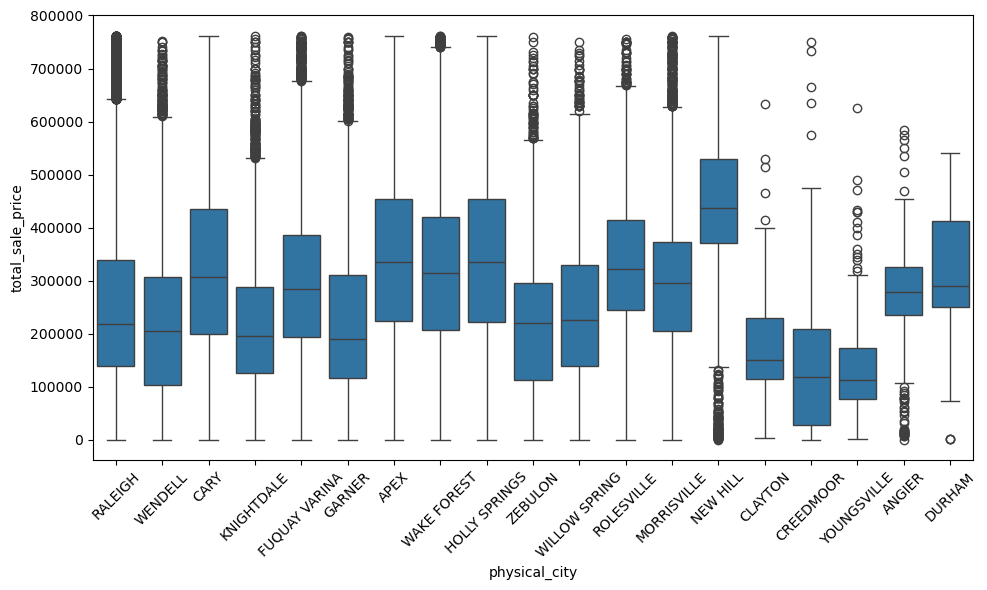

In [145]:
plt.figure(figsize=(10,6))
sns.boxplot(data=house_1, x='physical_city', y='total_sale_price')
plt.xticks(rotation=45)
plt.tight_layout();

looks much better

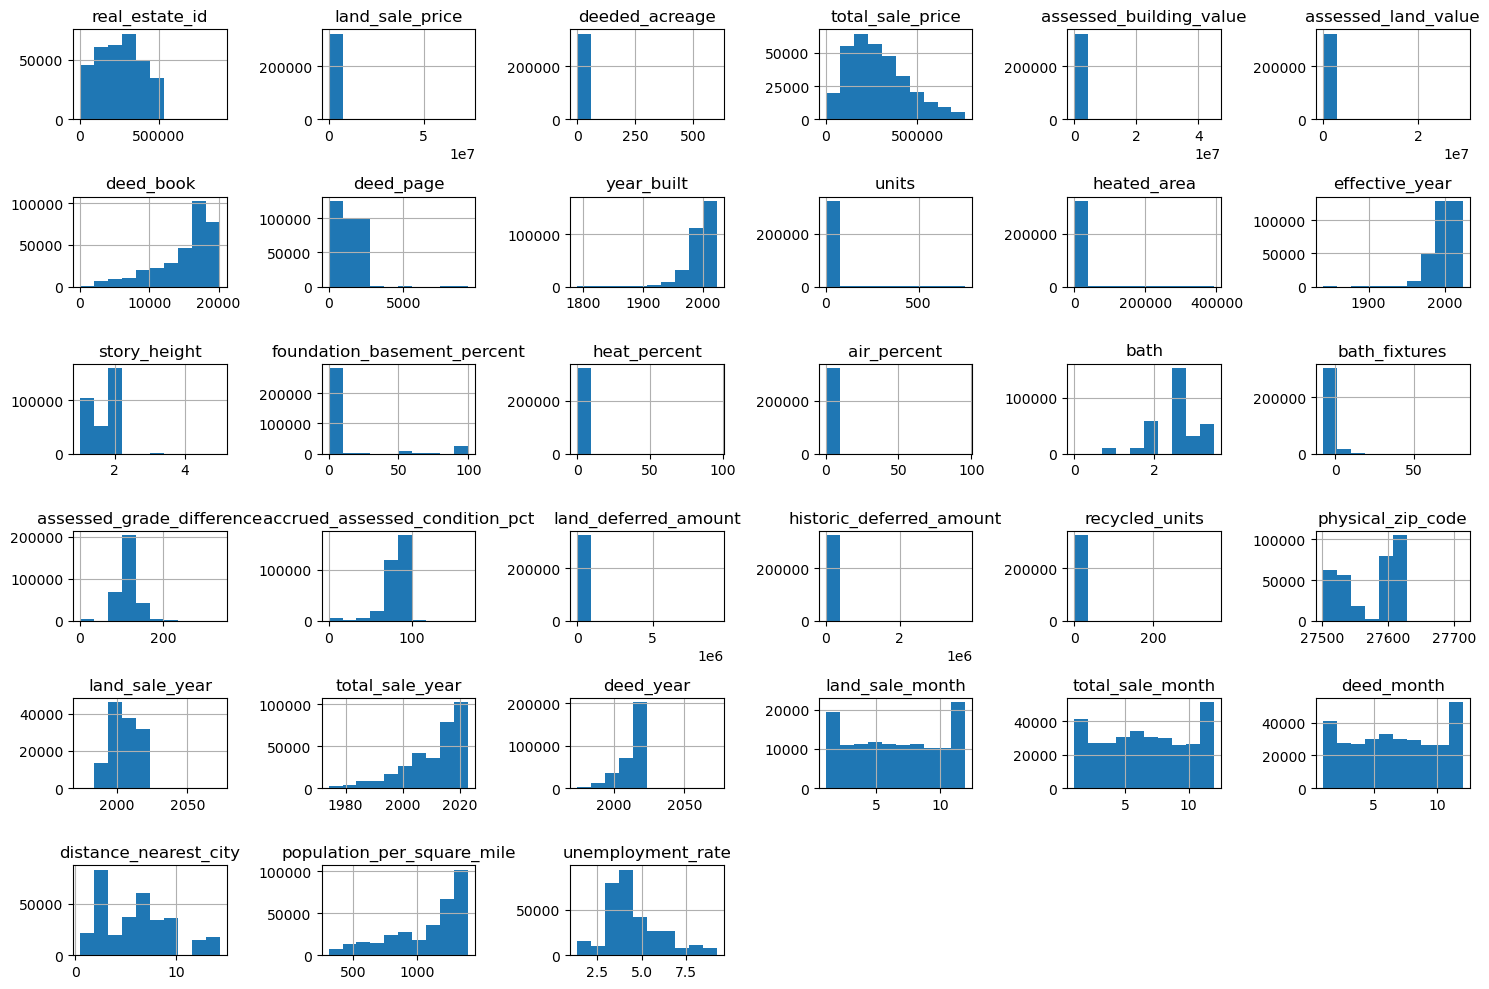

In [146]:
house_1.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.8)
plt.subplots_adjust(wspace=0.8)
plt.tight_layout()

the total_sale_price looks much better, but other variables like assessed_building_value and assessed_land_value are still not good. **Keep this in mind, if we need a smaller dataset, maybe we can do this.**

<font color=red>But the following, we still using original dataset.

### 3.4.2 Scatterplots

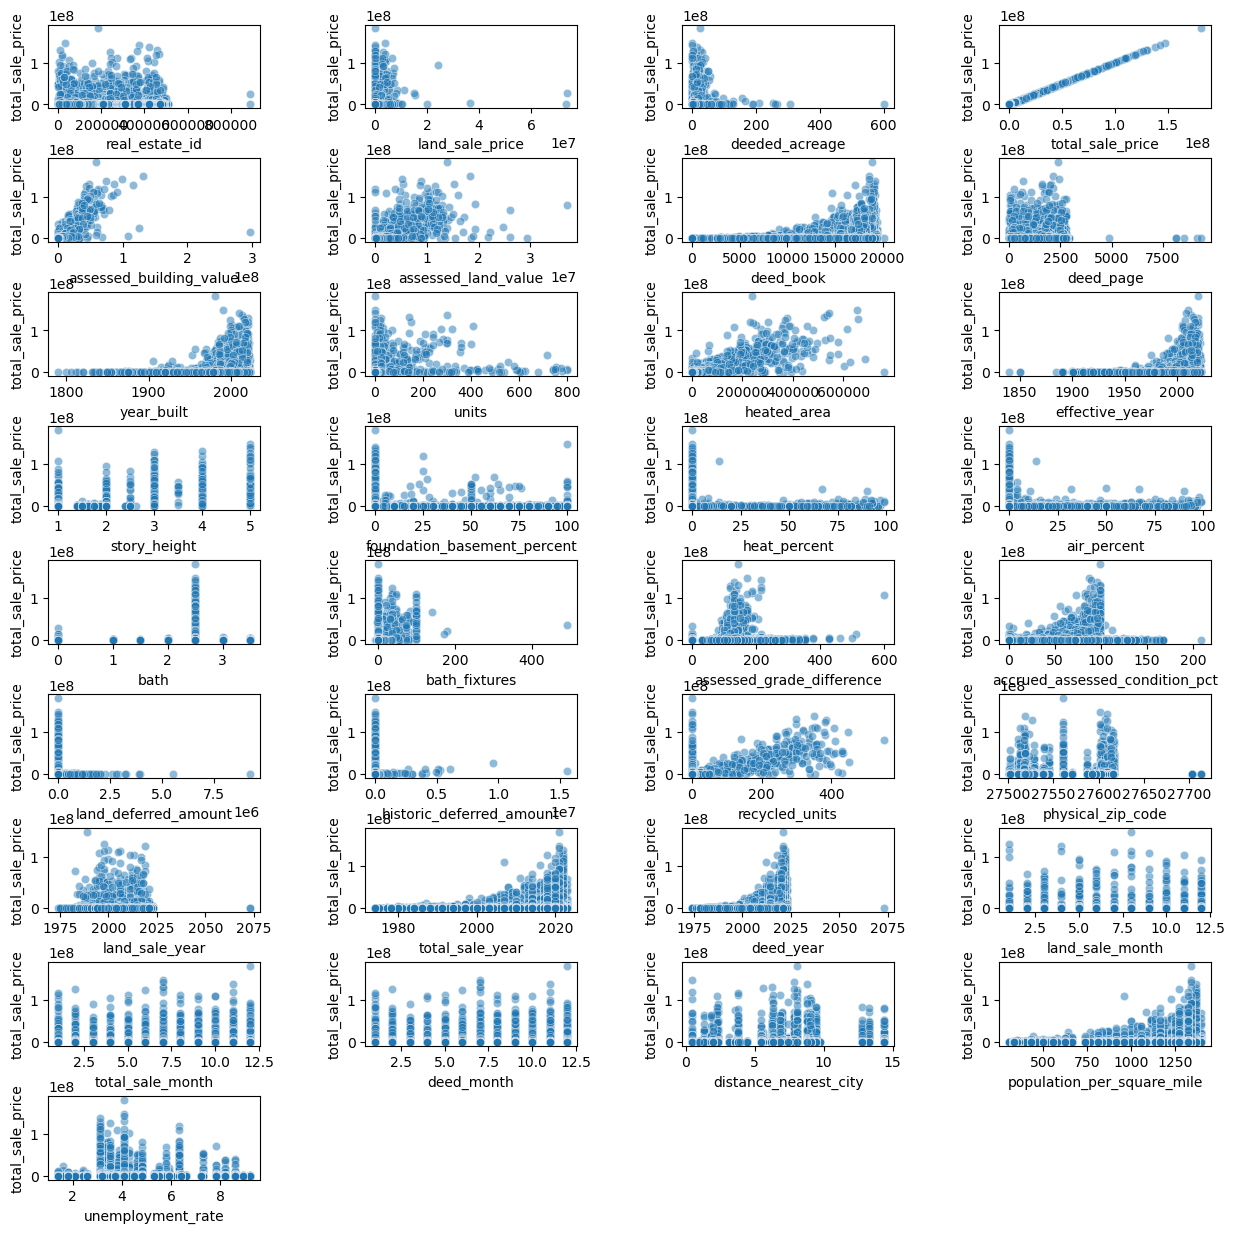

In [147]:
scatterplots(house, continuous_variables, ncol=4, figsize=(15, 15))

based on the scatterplots, we can find the assessed_building_value, heated_area have linear correlation with total_sale_price.<br>

the datatime variables like year_built, total_sale_year, deed_year and population_per_square_mile have exponential relationships with total_sale_price.<br>

<font color=red>try add new variables like squared(total_sale_year) or sqrt(total_sale_year) to see what happened to the linear model.

### 3.4.3 Skewness

In [148]:
house.skew(numeric_only=True).sort_values(ascending=False)

historic_deferred_amount          215.913998
land_sale_price                   210.253124
land_deferred_amount              135.296976
deeded_acreage                     80.450975
units                              67.035172
assessed_building_value            57.163974
total_sale_price                   38.361883
recycled_units                     36.887115
heat_percent                       30.075352
assessed_land_value                29.884370
bath_fixtures                      29.738362
heated_area                        29.505552
air_percent                        20.378425
foundation_basement_percent         2.510729
unemployment_rate                   0.832532
distance_nearest_city               0.537161
land_sale_year                      0.137521
deed_page                           0.126276
land_sale_month                     0.018917
deed_month                         -0.005927
total_sale_month                   -0.010947
real_estate_id                     -0.016517
story_heig

There are variables have very high positive skewness. May be try log transformation?

### 3.4.4 Check Statistics Before Log Transformation

In [149]:
continuous_des = house[continuous_variables].describe()
continuous_des

,real_estate_id,land_sale_price,deeded_acreage,total_sale_price,assessed_building_value,assessed_land_value,deed_book,deed_page,year_built,units,heated_area,effective_year,story_height,foundation_basement_percent,heat_percent,air_percent,bath,bath_fixtures,assessed_grade_difference,accrued_assessed_condition_pct,land_deferred_amount,historic_deferred_amount,recycled_units,physical_zip_code,land_sale_year,total_sale_year,deed_year,land_sale_month,total_sale_month,deed_month,distance_nearest_city,population_per_square_mile,unemployment_rate
count,339382.000000,3.393820e+05,339382.000000,3.393820e+05,3.393820e+05,3.393820e+05,339382.000000,339382.000000,334837.000000,339382.000000,339382.000000,334834.000000,333618.000000,339382.000000,339382.000000,339382.000000,333586.000000,339382.000000,339382.000000,339382.000000,3.393820e+05,3.393820e+05,339382.000000,339382.000000,136605.000000,339382.000000,339378.000000,136609.000000,339382.000000,339382.000000,339382.000000,339382.000000,339382.000000
mean,254950.157572,2.972616e+04,0.505235,3.953196e+05,3.181549e+05,1.082210e+05,15197.625272,1326.260450,1996.424484,1.149100,2860.733165,1999.837896,1.611363,10.831617,0.085429,0.179258,2.563233,0.525820,117.392036,81.104237,5.531802e+02,4.755161e+02,1.220604,27571.875256,2005.307251,2011.625351,2013.338440,6.563301,6.629600,6.646849,5.943799,1087.881155,4.442849
std,137710.153963,2.321669e+05,2.417555,1.885120e+06,1.427503e+06,3.541850e+05,4044.169270,816.673119,19.800017,7.505479,10678.263619,14.883105,0.460809,29.404170,2.356661,3.092351,0.599122,2.695846,26.739935,16.793507,3.110791e+04,4.302053e+04,7.832012,41.615929,9.194484,10.317608,9.234094,3.415126,3.282843,3.289257,3.649853,284.792880,1.538215
min,3.000000,0.000000e+00,0.000000,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,1790.000000,0.000000,0.000000,1840.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-8.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,27501.000000,1974.000000,1974.000000,1974.000000,1.000000,1.000000,1.000000,0.449741,306.877319,1.400000
25%,142807.250000,0.000000e+00,0.130000,1.630000e+05,1.577430e+05,4.500000e+04,13221.000000,606.000000,1986.000000,1.000000,1535.000000,1991.000000,1.000000,0.000000,0.000000,0.000000,2.500000,0.000000,105.000000,77.000000,0.000000e+00,0.000000e+00,1.000000,27526.000000,1998.000000,2006.000000,2008.000000,4.000000,4.000000,4.000000,2.260920,914.842127,3.400000
50%,253071.500000,0.000000e+00,0.230000,2.675000e+05,2.270455e+05,6.700000e+04,16691.000000,1284.000000,2000.000000,1.000000,2115.000000,2001.000000,1.880000,0.000000,0.000000,0.000000,2.500000,0.000000,115.000000,84.000000,0.000000e+00,0.000000e+00,1.000000,27591.000000,2005.000000,2015.000000,2017.000000,6.000000,7.000000,7.000000,6.143849,1193.520571,4.100000
75%,361219.250000,3.750000e+04,0.430000,4.030000e+05,3.206538e+05,1.050000e+05,18175.000000,2040.000000,2010.000000,1.000000,2849.000000,2010.000000,2.000000,0.000000,0.000000,0.000000,3.000000,0.000000,129.000000,91.000000,0.000000e+00,0.000000e+00,1.000000,27610.000000,2014.000000,2020.000000,2020.000000,9.000000,9.000000,9.000000,8.753320,1321.172201,4.800000
max,888888.000000,7.377030e+07,601.300000,1.818000e+08,2.967829e+08,3.706880e+07,20164.000000,9355.000000,2023.000000,801.000000,761280.000000,2023.000000,5.000000,100.000000,99.000000,99.000000,3.500000,492.000000,601.000000,209.000000,9.235956e+06,1.557659e+07,552.000000,27713.000000,2073.000000,2023.000000,2073.000000,12.000000,12.000000,12.000000,14.375230,1397.792350,9.200000


it's strange bath_fixtures minimum is -8, check it

In [150]:
house['bath_fixtures'].unique()

array([  0,   8,   2,   6,   7,   4,   5,  20,  19,   1,  15,  10,  11,
        27,  16,  35,  14,  13,  21,  36,  66,   3,  84,   9,  -8,  78,
        12,  25,  99,  74,  24,  18,  23,  31,  87,  30,  54,  72,  17,
        -4,  48,  60, 180, 171,  28,  -2,  81,  22,  41,  42,  26,  53,
        56,  80,  -3,  43,  55,  34,  45,  39,  50,  97,  40,  -1, 492,
        51,  76,  32,  69,  90,  29,  -5,  33, 141,  63], dtype=int64)

change negative bath_fixtures to 0

In [151]:
house.loc[house['bath_fixtures']<0, 'bath_fixtures'] = 0

check again

In [152]:
continuous_des = house[continuous_variables].describe()
continuous_des

,real_estate_id,land_sale_price,deeded_acreage,total_sale_price,assessed_building_value,assessed_land_value,deed_book,deed_page,year_built,units,heated_area,effective_year,story_height,foundation_basement_percent,heat_percent,air_percent,bath,bath_fixtures,assessed_grade_difference,accrued_assessed_condition_pct,land_deferred_amount,historic_deferred_amount,recycled_units,physical_zip_code,land_sale_year,total_sale_year,deed_year,land_sale_month,total_sale_month,deed_month,distance_nearest_city,population_per_square_mile,unemployment_rate
count,339382.000000,3.393820e+05,339382.000000,3.393820e+05,3.393820e+05,3.393820e+05,339382.000000,339382.000000,334837.000000,339382.000000,339382.000000,334834.000000,333618.000000,339382.000000,339382.000000,339382.000000,333586.000000,339382.000000,339382.000000,339382.000000,3.393820e+05,3.393820e+05,339382.000000,339382.000000,136605.000000,339382.000000,339378.000000,136609.000000,339382.000000,339382.000000,339382.000000,339382.000000,339382.000000
mean,254950.157572,2.972616e+04,0.505235,3.953196e+05,3.181549e+05,1.082210e+05,15197.625272,1326.260450,1996.424484,1.149100,2860.733165,1999.837896,1.611363,10.831617,0.085429,0.179258,2.563233,0.526127,117.392036,81.104237,5.531802e+02,4.755161e+02,1.220604,27571.875256,2005.307251,2011.625351,2013.338440,6.563301,6.629600,6.646849,5.943799,1087.881155,4.442849
std,137710.153963,2.321669e+05,2.417555,1.885120e+06,1.427503e+06,3.541850e+05,4044.169270,816.673119,19.800017,7.505479,10678.263619,14.883105,0.460809,29.404170,2.356661,3.092351,0.599122,2.695570,26.739935,16.793507,3.110791e+04,4.302053e+04,7.832012,41.615929,9.194484,10.317608,9.234094,3.415126,3.282843,3.289257,3.649853,284.792880,1.538215
min,3.000000,0.000000e+00,0.000000,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,1790.000000,0.000000,0.000000,1840.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,27501.000000,1974.000000,1974.000000,1974.000000,1.000000,1.000000,1.000000,0.449741,306.877319,1.400000
25%,142807.250000,0.000000e+00,0.130000,1.630000e+05,1.577430e+05,4.500000e+04,13221.000000,606.000000,1986.000000,1.000000,1535.000000,1991.000000,1.000000,0.000000,0.000000,0.000000,2.500000,0.000000,105.000000,77.000000,0.000000e+00,0.000000e+00,1.000000,27526.000000,1998.000000,2006.000000,2008.000000,4.000000,4.000000,4.000000,2.260920,914.842127,3.400000
50%,253071.500000,0.000000e+00,0.230000,2.675000e+05,2.270455e+05,6.700000e+04,16691.000000,1284.000000,2000.000000,1.000000,2115.000000,2001.000000,1.880000,0.000000,0.000000,0.000000,2.500000,0.000000,115.000000,84.000000,0.000000e+00,0.000000e+00,1.000000,27591.000000,2005.000000,2015.000000,2017.000000,6.000000,7.000000,7.000000,6.143849,1193.520571,4.100000
75%,361219.250000,3.750000e+04,0.430000,4.030000e+05,3.206538e+05,1.050000e+05,18175.000000,2040.000000,2010.000000,1.000000,2849.000000,2010.000000,2.000000,0.000000,0.000000,0.000000,3.000000,0.000000,129.000000,91.000000,0.000000e+00,0.000000e+00,1.000000,27610.000000,2014.000000,2020.000000,2020.000000,9.000000,9.000000,9.000000,8.753320,1321.172201,4.800000
max,888888.000000,7.377030e+07,601.300000,1.818000e+08,2.967829e+08,3.706880e+07,20164.000000,9355.000000,2023.000000,801.000000,761280.000000,2023.000000,5.000000,100.000000,99.000000,99.000000,3.500000,492.000000,601.000000,209.000000,9.235956e+06,1.557659e+07,552.000000,27713.000000,2073.000000,2023.000000,2073.000000,12.000000,12.000000,12.000000,14.375230,1397.792350,9.200000


### 3.4.5 Distribution and Correlation After Log Transformation

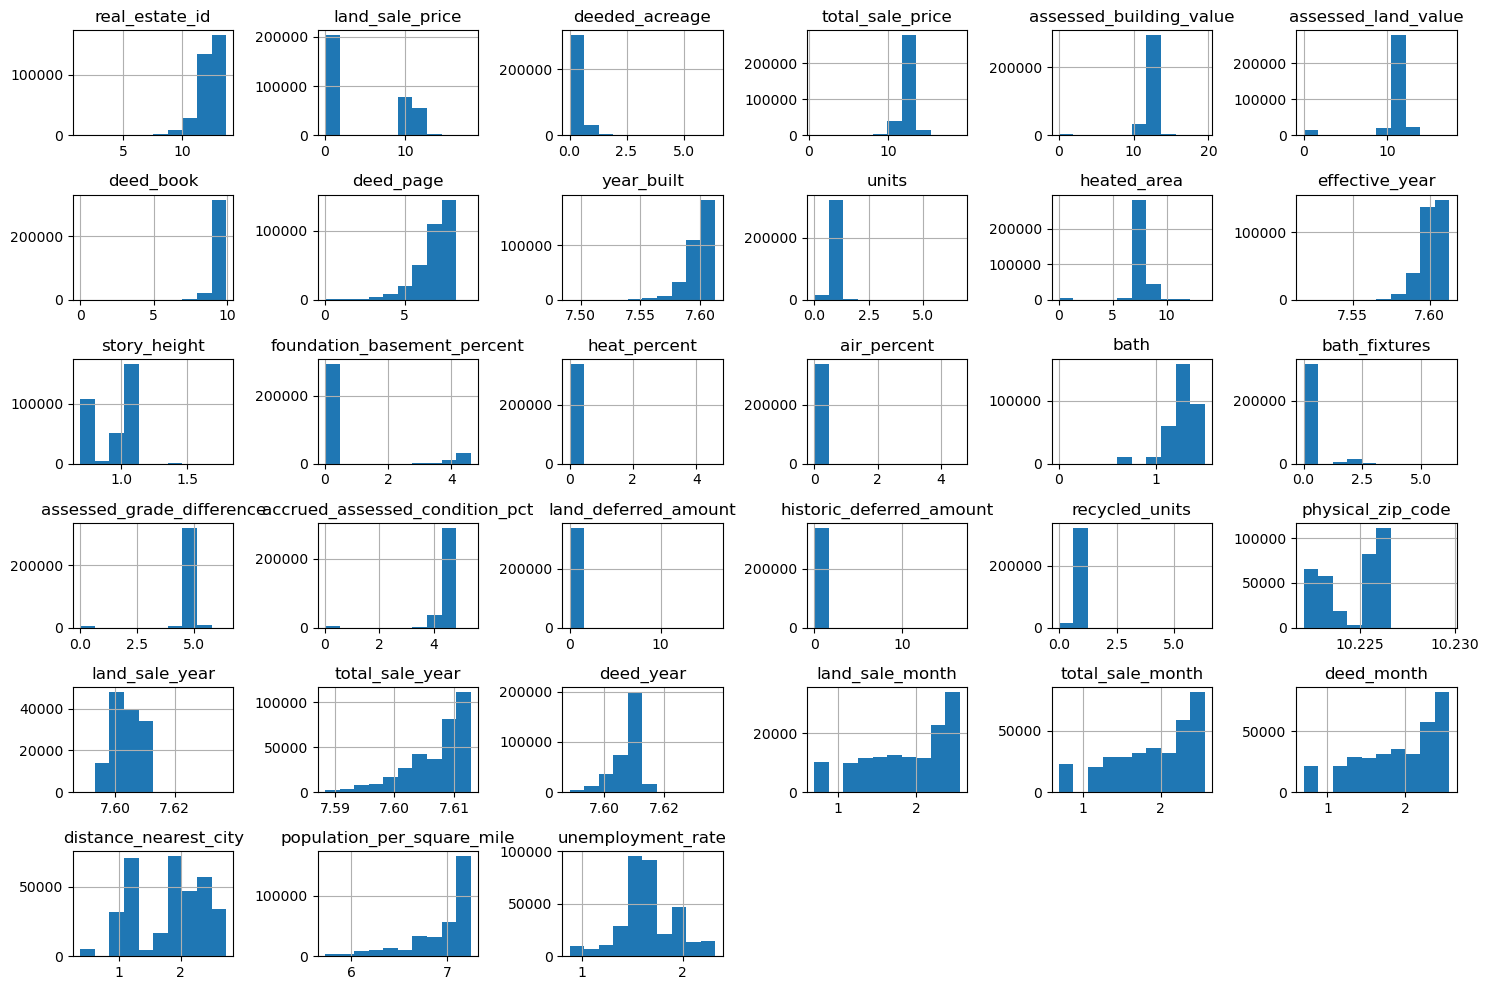

In [153]:
np.log1p(house[continuous_variables]).hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.8)
plt.subplots_adjust(wspace=0.8)
plt.tight_layout();

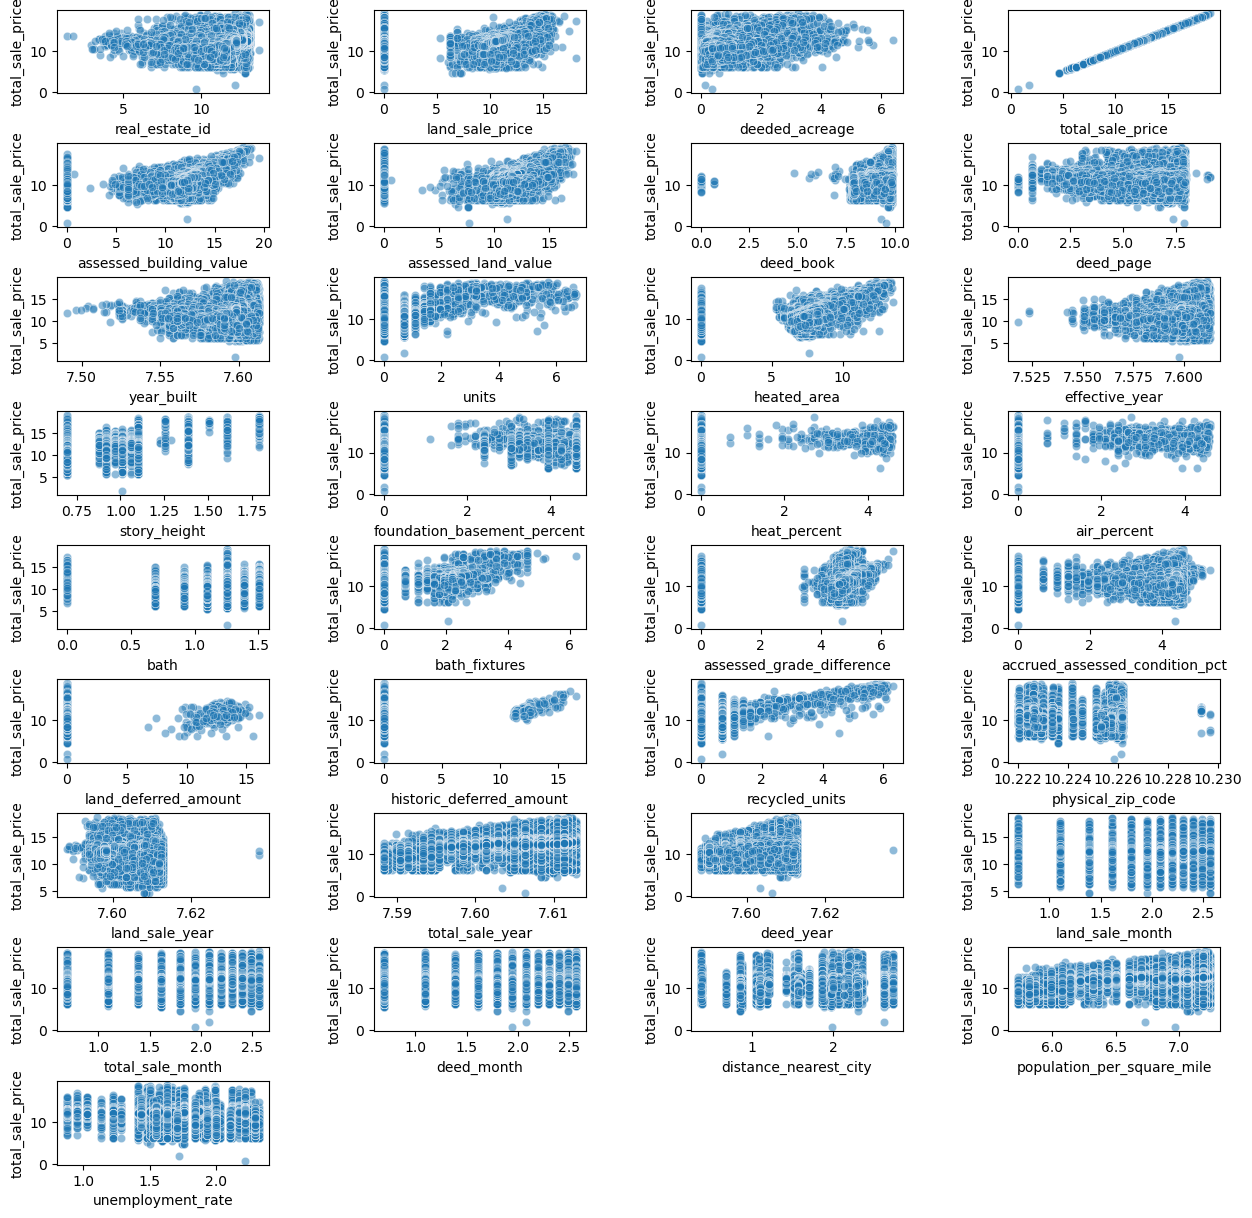

In [154]:
scatterplots(np.log1p(house[continuous_variables]), continuous_variables, ncol=4, figsize=(15, 15))

It looks like in land_sale_price, deeded_acreage, assessed_building_value, assessed_land_value, units, heated_area, foundation_basement_percent, heat_percent, air_percent, bath_fixtures, assessed_grade_difference, accrued_assessed_condition_pct, land_deferred_amount, historic_deferred_amount, recycled_units, there are lot of value=0, <font color=red>but after I check the wake county real estate website, actually these values is NOT inputed! That means they should be nan.

### 3.4.6 Heatmap Before and After Log Transformation

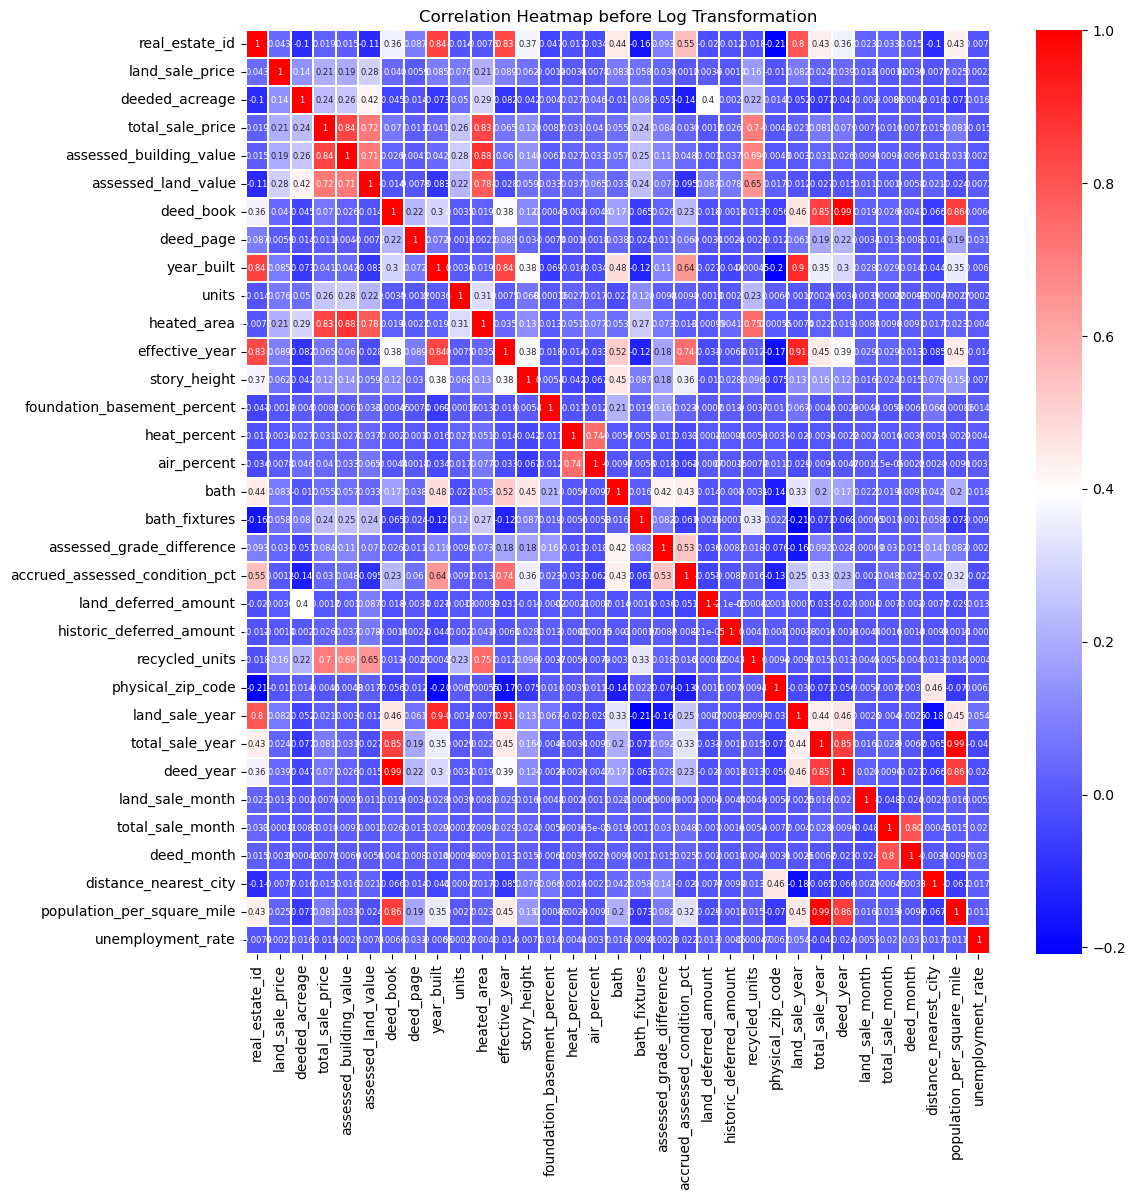

In [155]:
plt.figure(figsize=(12,12))
sns.heatmap(house.corr(numeric_only=True), annot=True, cmap="bwr", linewidths=0.05, annot_kws={"fontsize":6})
_ = plt.title('Correlation Heatmap before Log Transformation')

the variables assessed_building_value and heated_area have positive correlation with total_sale_price, same results as scatterplots<br>

there are some correlation between assessed_building_value and heated_area (coefficient=0.88)<br>

there are some correlation between total_sale_year and population_per_square_miles (coefficient=0.99)<br>

But this maybe fine, multicollinearity may not influence the model too much, however, **keep this in mind, if we need to improve the efficiency of the model, maybe we can remove some variables redundancy.**

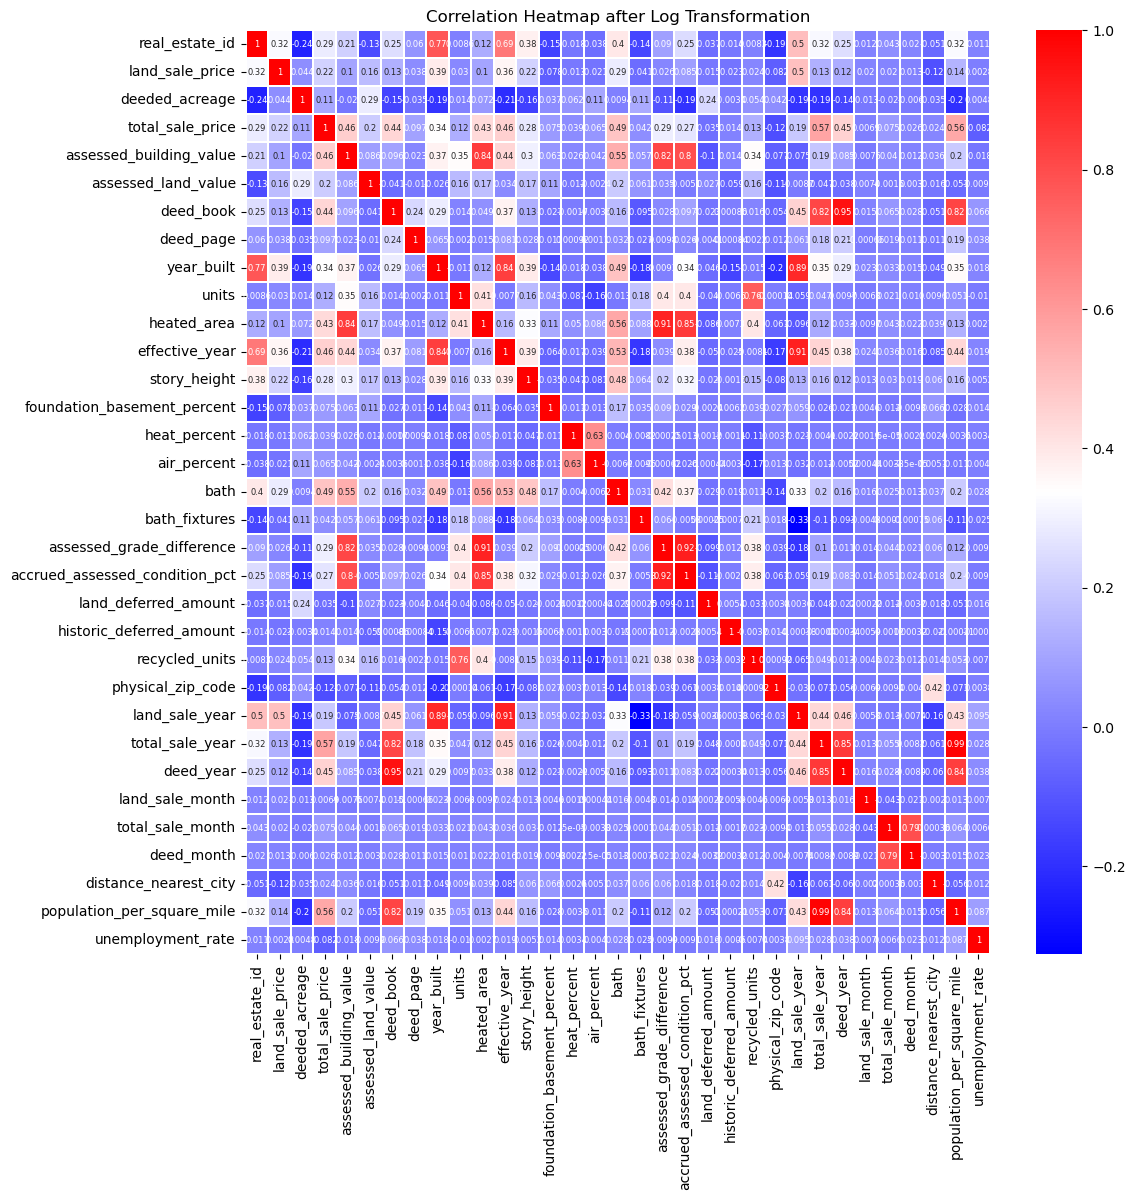

In [156]:
plt.figure(figsize=(12,12))
sns.heatmap(np.log1p(house[continuous_variables]).corr(numeric_only=True), annot=True, cmap="bwr", linewidths=0.05, annot_kws={"fontsize":6})
_ = plt.title('Correlation Heatmap after Log Transformation')

after log, the correlations of assessed_building_value and heated_area with total_sale_price became weak<br>

there are still correlation between assessed_building_value and heated_area (coefficient=0.84) after log<br>

there are still correlation between total_sale_year and population_per_square_miles (coefficient=0.99) after log<br>

before log tranformation, have 4 high correlation variables 0.70-0.84.      
after log tranformation, have 8 high correlation variables 0.43-0.57.   

### 3.4.7 Check Zero Values

In [157]:
zero_value_columns = ['land_sale_price', 'deeded_acreage', 'assessed_building_value', 
                      'assessed_land_value', 'units', 'heated_area', 'foundation_basement_percent', 
                      'heat_percent', 'air_percent', 'assessed_grade_difference', 'land_deferred_amount',
                      'historic_deferred_amount', 'recycled_units']

In [158]:
for column in zero_value_columns:
    print(f"In column {column}. there are {house[house[column]==0].shape[0]/house.shape[0]*100}% have value 0")

In column land_sale_price. there are 59.75095909623963% have value 0
In column deeded_acreage. there are 4.694415142818417% have value 0
In column assessed_building_value. there are 1.1500315278948205% have value 0
In column assessed_land_value. there are 4.818464149542404% have value 0
In column units. there are 4.485211354756586% have value 0
In column heated_area. there are 1.6980865219722907% have value 0
In column foundation_basement_percent. there are 86.79246394917821% have value 0
In column heat_percent. there are 99.84324448556494% have value 0
In column air_percent. there are 99.54593938393904% have value 0
In column assessed_grade_difference. there are 1.6957292961913124% have value 0
In column land_deferred_amount. there are 99.90836284776447% have value 0
In column historic_deferred_amount. there are 99.91572917833003% have value 0
In column recycled_units. there are 4.677914562351568% have value 0


1. replace 0 in land_sale_price, deeded_acreage, assessed_building_value, assessed_land_value, heated_area,  assessed_grade_difference with np.nan.
2. 0 in units, recycled_units, foundation_basement_percent are difficult to handle. for one family house, units and recycled_units set to 1, two family house, units and recycled_units set to 2, other type of houses are hard to determine. foundation_basement_percent=0 may mean the house don't have basement, maybe have crawl space etc.
3. drop columns with precentage large than 99%, heat_percent, air_percent, land_deferred_amount, historic_deferred_amount. <font color=red> needs modeling to confirm the result.

In [159]:
house['land_sale_price'] = house['land_sale_price'].replace(0, np.nan)
house['deeded_acreage'] = house['deeded_acreage'].replace(0, np.nan)
house['assessed_building_value'] = house['assessed_building_value'].replace(0, np.nan)
house['assessed_land_value'] = house['assessed_land_value'].replace(0, np.nan)
house['heated_area'] = house['heated_area'].replace(0, np.nan)
house['assessed_grade_difference'] = house['assessed_grade_difference'].replace(0, np.nan)

In [160]:
house.loc[(house['units']==0)&(house['type_and_use']=='ONE FAMILY'), 'units']=1
house.loc[(house['units']==0)&(house['type_and_use']=='TWO FAMILY'), 'units']=2
house.loc[(house['units']==0)&(house['type_and_use']=='THREE FAMILY'), 'units']=3
house.loc[(house['units']==0)&(house['type_and_use']=='FOUR FAMILY'), 'units']=4
house.loc[(house['units']==0)&(house['type_and_use']=='MULTI-FAMILY'), 'units']=5

In [161]:
house.loc[(house['recycled_units']==0)&(house['type_and_use']=='ONE FAMILY'), 'units']=1
house.loc[(house['recycled_units']==0)&(house['type_and_use']=='TWO FAMILY'), 'units']=2
house.loc[(house['recycled_units']==0)&(house['type_and_use']=='THREE FAMILY'), 'units']=3
house.loc[(house['recycled_units']==0)&(house['type_and_use']=='FOUR FAMILY'), 'units']=4
house.loc[(house['recycled_units']==0)&(house['type_and_use']=='MULTI-FAMILY'), 'units']=5

## 3.5 Output and Conclusion

In [162]:
house.to_csv('house_Nov02_2023.csv')

Based on these EDA, we find 

1. this is a very large skewed dataset with 339867 rows and 60 columns.     
2. we may need to remove small outliers like min value=0 or remove large outliers like value large than 1.5 times IQR. or do both for data cleaning. this will be helpful not only for linear but also non-linear.             
3. we may try use the dataset for some non-linear model like RandomForest regressor, Gradient Boost, SVM, neutral network,  etc. But the disadvantage is the cost will be high and time consuming will be much longer for such a big dataset.                
4. we may try select only the residential house if necessary.   
5. for next step data preprocessing and training, suggest try to start with large dataset with linear model, then try to use non-linear models on the dataset, must consider the time used, if it's very long time (for exmaple, 10 min per run), may need to do some data cleaning further, because, this will a disaster for cross validation and hyperparameter tuning.

keep exploring!!!

